# Pre -processing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt



In [ ]:
data =  pd.read_csv('/content/dataset.csv')
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


Number of Malicious and Benign 


In [ ]:
counts = data['Type'].value_counts()
counts

0    1565
1     216
Name: Type, dtype: int64

In [ ]:
data.describe(include='all')




,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,969.000000,1781,1781,1781,1781,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,9,239,NaN,49,182,891,594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B0_2246,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,127,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [ ]:
print(len(data))

1781


In [ ]:
data = data.drop(labels=['URL','WHOIS_REGDATE','WHOIS_UPDATED_DATE'],axis=1)
print(data.isnull().sum())

data[pd.isnull(data).any(axis='columns')]
print(len(data))

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64
1781


In [ ]:
processed_data =  data.interpolate()
print(processed_data.isnull().sum())

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [ ]:
max_value = processed_data['SERVER'].value_counts().idxmax()

print('Highest frequency value:',max_value)

processed_data['SERVER'].fillna(max_value, inplace=True)

print(processed_data.isnull().sum())

Highest frequency value: Apache
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [ ]:
print(len(data))

1781


In [ ]:
# def plot_freq(df, column, n = None):  
#     counts = df[column].value_counts()
#     Indices = counts.index
#     if n == None:
#         n = len(Indices)
   
#     plt.figure(figsize=(20,10)) 
#     plt.title("Value Counts (Overall) for " + column) 
#     plt.bar(range(n), counts[:n], color="g", align="center") 
#     plt.xticks(range(n), Indices[:n], fontsize=11, rotation=90) 
#     plt.xlim([-1, n]) 
#     plt.show() 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


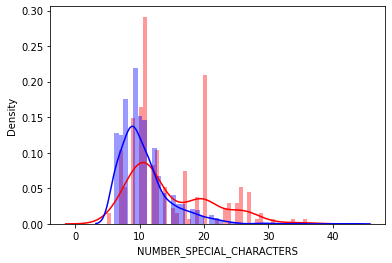

In [ ]:
import seaborn as sns
sns.distplot(data.loc[data['Type'] == 1]['NUMBER_SPECIAL_CHARACTERS'], bins = 50, color='red')
sns.distplot(data.loc[data['Type'] == 0]['NUMBER_SPECIAL_CHARACTERS'], bins = 50, color='blue')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


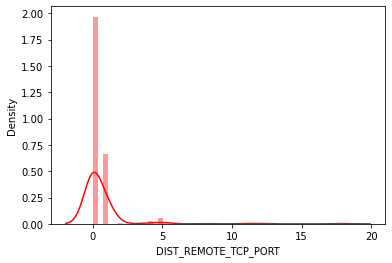

In [ ]:
sns.distplot(data.loc[data['Type'] == 1]['DIST_REMOTE_TCP_PORT'], bins = 50, color='red')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


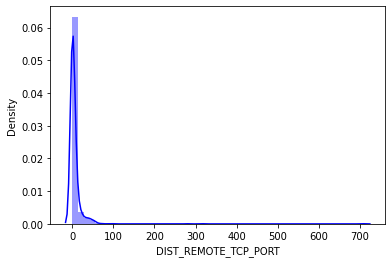

In [ ]:
sns.distplot(data.loc[data['Type'] == 0]['DIST_REMOTE_TCP_PORT'], bins = 50, color='blue')

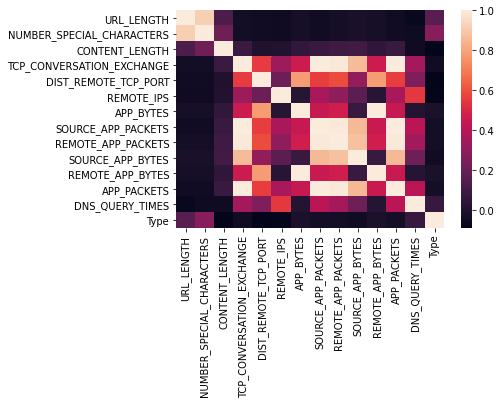

In [ ]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

KNN ALGO


In [ ]:
knn_data = pd.get_dummies(processed_data, prefix_sep="_")
knn_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_.V01 Apache,SERVER_294,SERVER_ATS,SERVER_ATS/5.3.0,SERVER_Aeria Games & Entertainment,SERVER_AkamaiGHost,SERVER_AmazonS3,SERVER_Apache,SERVER_Apache-Coyote/1.1,SERVER_Apache/1.3.27 (Unix) (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.9.6b,SERVER_Apache/1.3.27 (Unix) PHP/4.4.1,SERVER_Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20,SERVER_Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8,SERVER_Apache/1.3.34 (Unix) PHP/4.4.4,SERVER_Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1,SERVER_Apache/1.3.39 (Unix) PHP/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a FrontPage/5.0.2.2635 DAV/1.0.3 mod_ssl/2.8.30 OpenSSL/0.9.7a,SERVER_Apache/1.3.42 Ben-SSL/1.60 (Unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 Chili!Soft-ASP/3.6.2 FrontPage/5.0.2.2635 mod_perl/1.31 PHP/4.4.9,...,WHOIS_STATEPRO_UK,WHOIS_STATEPRO_UT,WHOIS_STATEPRO_UTAH,WHOIS_STATEPRO_UTTAR PRADESH,WHOIS_STATEPRO_Utah,WHOIS_STATEPRO_Utr,WHOIS_STATEPRO_VA,WHOIS_STATEPRO_VERMONT,WHOIS_STATEPRO_VIC,WHOIS_STATEPRO_VT,WHOIS_STATEPRO_Vi,WHOIS_STATEPRO_Vic,WHOIS_STATEPRO_Virginia,WHOIS_STATEPRO_WA,WHOIS_STATEPRO_WC1N,WHOIS_STATEPRO_WEST MIDLANDS,WHOIS_STATEPRO_WI,WHOIS_STATEPRO_WV,WHOIS_STATEPRO_Washington,WHOIS_STATEPRO_Wisconsin,WHOIS_STATEPRO_ZH,WHOIS_STATEPRO_Zhejiang,WHOIS_STATEPRO_Zug,WHOIS_STATEPRO_ab,WHOIS_STATEPRO_bangkok,WHOIS_STATEPRO_bc,WHOIS_STATEPRO_beijingshi,WHOIS_STATEPRO_ca,WHOIS_STATEPRO_hunansheng,WHOIS_STATEPRO_il,WHOIS_STATEPRO_kireka,WHOIS_STATEPRO_liaoningsheng,WHOIS_STATEPRO_nj,WHOIS_STATEPRO_ny,WHOIS_STATEPRO_qc,WHOIS_STATEPRO_quebec,WHOIS_STATEPRO_shandong,WHOIS_STATEPRO_va,WHOIS_STATEPRO_widestep@mail.ru,WHOIS_STATEPRO_worcs
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = knn_data.drop(labels='Type', axis='columns')
y = knn_data['Type']
X.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,CHARSET_ISO-8859,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_.V01 Apache,SERVER_294,SERVER_ATS,SERVER_ATS/5.3.0,SERVER_Aeria Games & Entertainment,SERVER_AkamaiGHost,SERVER_AmazonS3,SERVER_Apache,SERVER_Apache-Coyote/1.1,SERVER_Apache/1.3.27 (Unix) (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.9.6b,SERVER_Apache/1.3.27 (Unix) PHP/4.4.1,SERVER_Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20,SERVER_Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8,SERVER_Apache/1.3.34 (Unix) PHP/4.4.4,SERVER_Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1,SERVER_Apache/1.3.39 (Unix) PHP/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a FrontPage/5.0.2.2635 DAV/1.0.3 mod_ssl/2.8.30 OpenSSL/0.9.7a,SERVER_Apache/1.3.42 Ben-SSL/1.60 (Unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 Chili!Soft-ASP/3.6.2 FrontPage/5.0.2.2635 mod_perl/1.31 PHP/4.4.9,SERVER_Apache/2,...,WHOIS_STATEPRO_UK,WHOIS_STATEPRO_UT,WHOIS_STATEPRO_UTAH,WHOIS_STATEPRO_UTTAR PRADESH,WHOIS_STATEPRO_Utah,WHOIS_STATEPRO_Utr,WHOIS_STATEPRO_VA,WHOIS_STATEPRO_VERMONT,WHOIS_STATEPRO_VIC,WHOIS_STATEPRO_VT,WHOIS_STATEPRO_Vi,WHOIS_STATEPRO_Vic,WHOIS_STATEPRO_Virginia,WHOIS_STATEPRO_WA,WHOIS_STATEPRO_WC1N,WHOIS_STATEPRO_WEST MIDLANDS,WHOIS_STATEPRO_WI,WHOIS_STATEPRO_WV,WHOIS_STATEPRO_Washington,WHOIS_STATEPRO_Wisconsin,WHOIS_STATEPRO_ZH,WHOIS_STATEPRO_Zhejiang,WHOIS_STATEPRO_Zug,WHOIS_STATEPRO_ab,WHOIS_STATEPRO_bangkok,WHOIS_STATEPRO_bc,WHOIS_STATEPRO_beijingshi,WHOIS_STATEPRO_ca,WHOIS_STATEPRO_hunansheng,WHOIS_STATEPRO_il,WHOIS_STATEPRO_kireka,WHOIS_STATEPRO_liaoningsheng,WHOIS_STATEPRO_nj,WHOIS_STATEPRO_ny,WHOIS_STATEPRO_qc,WHOIS_STATEPRO_quebec,WHOIS_STATEPRO_shandong,WHOIS_STATEPRO_va,WHOIS_STATEPRO_widestep@mail.ru,WHOIS_STATEPRO_worcs
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Training size: %d" % len(y_train))
print("Test size    : %d" % len(y_test))

Training size: 1246
Test size    : 535


In [ ]:
 pip install imbalanced-learn

In [ ]:

from imblearn.over_sampling import SMOTE
oversample = SMOTE() #synthetic minority oversampling technique
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
unique, frequency = np.unique(y_train,  
                              return_counts = True) 
# print unique values array 
print("Unique Values:",  
      unique) 
  
# print frequency array 
print("Frequency Values:", 
      frequency)

Unique Values: [0 1]
Frequency Values: [1093 1093]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=10

clf = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred[30:60])
print("Ground truth    : ", y_test.to_numpy()[30:60])

print("Accuracy of %d NN: %.2f %%" % (k, 100 * accuracy_score(y_test.to_numpy(), y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),clf.predict(X_test))))

Print results for 30 test data points:
Predicted labels:  [0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0]
Ground truth    :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
Accuracy of 10 NN: 83.74 %
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       472
           1       0.41      0.83      0.54        63

    accuracy                           0.84       535
   macro avg       0.69      0.83      0.72       535
weighted avg       0.91      0.84      0.86       535




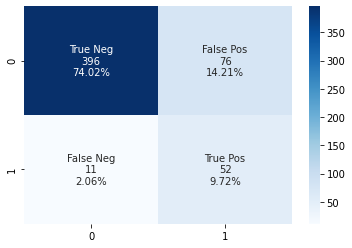

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred[30:60])
print("Ground truth    : ", y_test.to_numpy()[30:60])

print("Accuracy of GNB: %.2f %%" % ( 100 * accuracy_score(y_test.to_numpy(), y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),nb_clf.predict(X_test))))

Print results for 30 test data points:
Predicted labels:  [1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0]
Ground truth    :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
Accuracy of GNB: 26.17 %
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.17      0.28       472
           1       0.14      0.98      0.24        63

    accuracy                           0.26       535
   macro avg       0.56      0.57      0.26       535
weighted avg       0.89      0.26      0.28       535




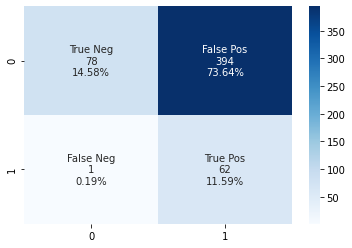

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Multinomial


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_clf= MultinomialNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred[30:60])
print("Ground truth    : ", y_test.to_numpy()[30:60])

print("Accuracy of MNB: %.2f %%" % ( 100 * accuracy_score(y_test.to_numpy(), y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),nb_clf.predict(X_test))))

Print results for 30 test data points:
Predicted labels:  [1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0]
Ground truth    :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
Accuracy of MNB: 39.63 %
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.39      0.54       472
           1       0.08      0.41      0.14        63

    accuracy                           0.40       535
   macro avg       0.46      0.40      0.34       535
weighted avg       0.75      0.40      0.49       535




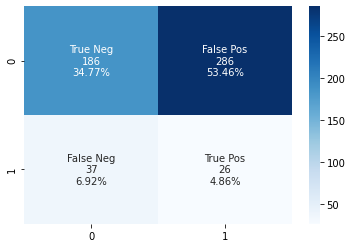

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb_clf= BernoulliNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred[30:60])
print("Ground truth    : ", y_test.to_numpy()[30:60])

print("Accuracy of BNB: %.2f %%" % ( 100 * accuracy_score(y_test.to_numpy(), y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),nb_clf.predict(X_test))))

Print results for 30 test data points:
Predicted labels:  [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1]
Ground truth    :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
Accuracy of BNB: 81.31 %
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       472
           1       0.37      0.83      0.51        63

    accuracy                           0.81       535
   macro avg       0.67      0.82      0.70       535
weighted avg       0.90      0.81      0.84       535




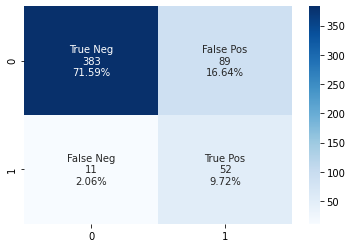

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
X =X_train
Y = y_train
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed)


num_trees = 100
modelKNN = BaggingClassifier(base_estimator=clf, random_state=seed)
results = model_selection.cross_val_score(modelKNN, X, Y, cv=kfold)

print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8331385362992754


In [ ]:

seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed)


num_trees = 100
modelBernoulli = BaggingClassifier(base_estimator=BernoulliNB(), random_state=seed)
results = model_selection.cross_val_score(modelBernoulli, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8903292698253111


In [ ]:

seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed)


num_trees = 100
modelmulti = BaggingClassifier(base_estimator=MultinomialNB(),  random_state=seed)
results = model_selection.cross_val_score(modelmulti, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.4199572703280131


In [ ]:

from sklearn import model_selection
from sklearn.ensemble import VotingClassifier


X =X_train
Y = y_train
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = clf
estimators.append(('KNN', modelKNN))
model2 = MultinomialNB()
estimators.append(('MultinomialNB', modelmulti))
model3 =BernoulliNB()
estimators.append(('BernoulliNB', modelBernoulli))

# create the ensemble model
ensemble = VotingClassifier(estimators)
#print(ensemble)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9029198609191068


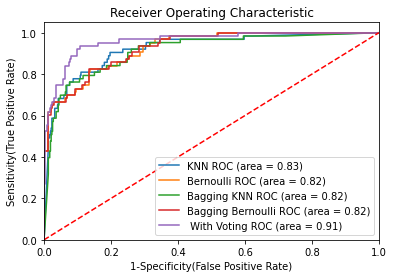

In [ ]:

#from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'KNN',
    'model': clf,
},
{
    'label': 'Bernoulli',
    'model': BernoulliNB(),
},
{
    'label': 'Bagging KNN',
    'model': BaggingClassifier(base_estimator=clf, random_state=seed),
},
{
    'label': 'Bagging Bernoulli',
    'model': BaggingClassifier(base_estimator=BernoulliNB(), random_state=seed),
},
{
    'label': ' With Voting',
    'model':  VotingClassifier(estimators,voting='soft'),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display